In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

More or less followed along to Rob Mulla's tutorial here: https://www.youtube.com/watch?v=xi0vhXFPegw&t=2252s

In [149]:
df = pd.read_csv('dc_crime_add_vars.csv')

## Data Understanding
* shape
* head and tail
* dtypes
* describe

In [4]:
df.shape

(342867, 32)

In [5]:
df.head(3)

,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,CCN,START_DATE,END_DATE,XBLOCK,YBLOCK,optional,date,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,Cluster 4,000300 1,300.0,Precinct 6,8123749,8/30/2008 9:30:00 PM,8/31/2008 6:40:00 PM,-77.070209,38.913633,True,2008-08-31 20:47:00,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,2,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,Cluster 6,005500 5,5500.0,Precinct 14,8123824,8/31/2008 7:30:00 PM,8/31/2008 11:30:00 PM,-77.045323,38.908564,True,2008-09-01 00:45:00,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,3,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,Cluster 8,005800 1,5800.0,Precinct 129,8123835,8/31/2008 11:00:00 PM,9/1/2008 2:00:00 AM,-77.027045,38.899057,True,2008-09-01 03:00:00,2008,9,1,3,0,0,East,North,Northeast,Non-Violent


In [6]:
df.columns

Index(['Unnamed: 0', 'X', 'REPORT_DAT', 'SHIFT', 'OFFENSE', 'METHOD', 'BLOCK',
       'DISTRICT', 'PSA', 'WARD', 'ANC', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP',
       'CENSUS_TRACT', 'VOTING_PRECINCT', 'CCN', 'START_DATE', 'END_DATE',
       'XBLOCK', 'YBLOCK', 'optional', 'date', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'EW', 'NS', 'quad', 'crimetype'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0                int64
X                         int64
REPORT_DAT               object
SHIFT                    object
OFFENSE                  object
METHOD                   object
BLOCK                    object
DISTRICT                float64
PSA                     float64
WARD                      int64
ANC                      object
NEIGHBORHOOD_CLUSTER     object
BLOCK_GROUP              object
CENSUS_TRACT            float64
VOTING_PRECINCT          object
CCN                       int64
START_DATE               object
END_DATE                 object
XBLOCK                  float64
YBLOCK                  float64
optional                   bool
date                     object
year                      int64
month                     int64
day                       int64
hour                      int64
minute                    int64
second                    int64
EW                       object
NS                       object
quad                     object
crimetyp

In [8]:
df.describe()

,Unnamed: 0,X,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,year,month,day,hour,minute,second
count,342867.000000,342867.000000,342667.000000,342616.000000,342867.000000,341776.000000,3.428670e+05,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000
mean,171434.000000,171434.000000,3.727415,378.080069,4.449501,6218.780511,1.265285e+07,-77.008139,38.905970,2012.543651,6.655686,15.979505,13.228853,26.294750,6.789986
std,98977.321711,98977.321711,1.977502,197.334627,2.378859,3137.022064,2.845777e+06,0.036324,0.031595,2.810362,3.327466,8.760185,6.233693,18.106904,14.926954
min,1.000000,1.000000,1.000000,101.000000,1.000000,100.000000,1.000600e+05,-77.113642,38.813470,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,85717.500000,85717.500000,2.000000,206.000000,2.000000,3500.000000,1.012491e+07,-77.032380,38.890940,2010.000000,4.000000,8.000000,9.000000,10.000000,0.000000
50%,171434.000000,171434.000000,4.000000,401.000000,5.000000,7000.000000,1.303074e+07,-77.013122,38.906430,2013.000000,7.000000,16.000000,14.000000,28.000000,0.000000
75%,257150.500000,257150.500000,5.000000,507.000000,6.000000,8904.000000,1.510258e+07,-76.985523,38.925286,2015.000000,9.000000,23.000000,18.000000,42.000000,0.000000
max,342867.000000,342867.000000,7.000000,708.000000,8.000000,11100.000000,9.943899e+07,-76.910010,38.994901,2017.000000,12.000000,31.000000,23.000000,59.000000,59.000000


## Data Preparation
* drop irrelevant columns and rows
* identify duplicate columns
* rename columns
* feature creation

In [150]:
cols_to_keep = [
    # 'REPORT_DAT', 
    'SHIFT', 
    'OFFENSE', 
    'METHOD', 
    'BLOCK',
    # 'DISTRICT', 
    # 'PSA', 
    # 'WARD', 
    # 'VOTING_PRECINCT', 
    # 'START_DATE',
    # 'END_DATE',
    'XBLOCK', 
    'YBLOCK', 
    'date', # same as report date but different format
    'year', 
    # 'month', 
    # 'day', 
    # 'hour',
    # 'minute', 
    # 'second', 'EW', 'NS', 
    'quad', 
    'crimetype'
    ]
df = df[cols_to_keep].copy()
df.head()

,SHIFT,OFFENSE,METHOD,BLOCK,XBLOCK,YBLOCK,date,year,quad,crimetype
0,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,-77.070209,38.913633,2008-08-31 20:47:00,2008,Northwest,Non-Violent
1,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,-77.045323,38.908564,2008-09-01 00:45:00,2008,Northwest,Non-Violent
2,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,-77.027045,38.899057,2008-09-01 03:00:00,2008,Northeast,Non-Violent
3,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,-77.040089,38.909638,2008-09-09 07:46:00,2008,Northwest,Non-Violent
4,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,-77.019377,38.894573,2008-08-24 20:00:00,2008,Northeast,Non-Violent


In [151]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

SHIFT                object
OFFENSE              object
METHOD               object
BLOCK                object
XBLOCK              float64
YBLOCK              float64
date         datetime64[ns]
year                  int64
quad                 object
crimetype            object
dtype: object

In [152]:
df['year'] = pd.to_numeric(df['year'])
df.dtypes

SHIFT                object
OFFENSE              object
METHOD               object
BLOCK                object
XBLOCK              float64
YBLOCK              float64
date         datetime64[ns]
year                  int64
quad                 object
crimetype            object
dtype: object

In [153]:
df.rename(mapper={old:old.lower() for old in df.columns}, inplace=True, axis=1)
df.rename(mapper={'xblock': 'block_lon', 'yblock': 'block_lat', 'date': 'report_date'}, axis=1, inplace=True)
df.head()

,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
0,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,-77.070209,38.913633,2008-08-31 20:47:00,2008,Northwest,Non-Violent
1,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,-77.045323,38.908564,2008-09-01 00:45:00,2008,Northwest,Non-Violent
2,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,-77.027045,38.899057,2008-09-01 03:00:00,2008,Northeast,Non-Violent
3,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,-77.040089,38.909638,2008-09-09 07:46:00,2008,Northwest,Non-Violent
4,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,-77.019377,38.894573,2008-08-24 20:00:00,2008,Northeast,Non-Violent


In [154]:
# Check null values
df.isna().sum()

shift          0
offense        0
method         0
block          0
block_lon      0
block_lat      0
report_date    0
year           0
quad           0
crimetype      0
dtype: int64

In [155]:
# Check duplicates (2nd and additional occurrences)
df.duplicated().sum()

# View duplicates across all cols
df.loc[df.duplicated()]

,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
251,DAY,THEFT/OTHER,OTHERS,400 - 499 BLOCK OF 8TH STREET NW,-77.022963,38.895464,2008-06-29 13:30:00,2008,Northeast,Non-Violent
623,EVENING,THEFT/OTHER,OTHERS,1224 - 1299 BLOCK OF WISCONSIN AVENUE NW,-77.062857,38.906430,2008-09-15 15:37:00,2008,Northwest,Non-Violent
810,EVENING,THEFT/OTHER,OTHERS,600 - 699 BLOCK OF 9TH STREET NW,-77.023960,38.897867,2008-09-21 19:25:00,2008,Northeast,Non-Violent
874,MIDNIGHT,BURGLARY,OTHERS,1200 - 1227 BLOCK OF 33RD STREET NW,-77.066073,38.905528,2008-08-22 07:00:00,2008,Northwest,Non-Violent
1072,DAY,BURGLARY,OTHERS,1100 - 1199 BLOCK OF 19TH STREET NW,-77.043464,38.904692,2008-10-09 09:30:00,2008,Northwest,Non-Violent
...,...,...,...,...,...,...,...,...,...,...
342503,DAY,THEFT/OTHER,OTHERS,1800 - 1899 BLOCK OF BILTMORE STREET NW,-77.043940,38.922320,2008-02-15 10:00:00,2008,Northwest,Non-Violent
342586,EVENING,THEFT/OTHER,OTHERS,1737 - 1776 BLOCK OF COLUMBIA ROAD NW,-77.040880,38.923860,2008-01-24 16:00:00,2008,Northwest,Non-Violent
342666,EVENING,ROBBERY,GUN,16TH STREET NW AND PARK ROAD NW,-77.036460,38.931650,2009-01-18 20:20:00,2009,Northwest,Violent
342678,EVENING,BURGLARY,OTHERS,1131 - 1299 BLOCK OF EUCLID STREET NW,-77.028880,38.923760,2008-03-24 19:49:00,2008,Northeast,Non-Violent


In [156]:
# Check one duplicate across multiple cols to confirm is true duplicate
df.query('(shift == "DAY") and (offense == "THEFT/OTHER") and (report_date == "2008-06-29 13:30:00") and (block == "400 - 499 BLOCK OF 8TH STREET NW")')

,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
250,DAY,THEFT/OTHER,OTHERS,400 - 499 BLOCK OF 8TH STREET NW,-77.022963,38.895464,2008-06-29 13:30:00,2008,Northeast,Non-Violent
251,DAY,THEFT/OTHER,OTHERS,400 - 499 BLOCK OF 8TH STREET NW,-77.022963,38.895464,2008-06-29 13:30:00,2008,Northeast,Non-Violent


In [157]:
df = df.loc[~df.duplicated()].reset_index(drop=True)
df

,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
0,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,-77.070209,38.913633,2008-08-31 20:47:00,2008,Northwest,Non-Violent
1,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,-77.045323,38.908564,2008-09-01 00:45:00,2008,Northwest,Non-Violent
2,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,-77.027045,38.899057,2008-09-01 03:00:00,2008,Northeast,Non-Violent
3,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,-77.040089,38.909638,2008-09-09 07:46:00,2008,Northwest,Non-Violent
4,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,-77.019377,38.894573,2008-08-24 20:00:00,2008,Northeast,Non-Violent
...,...,...,...,...,...,...,...,...,...,...
342352,DAY,MOTOR VEHICLE THEFT,OTHERS,2200 - 2230 BLOCK OF 6TH STREET NW,-77.020640,38.919610,2008-03-21 13:00:00,2008,Northeast,Non-Violent
342353,EVENING,THEFT/OTHER,OTHERS,3300 - 3341 BLOCK OF 16TH STREET NW,-77.036470,38.932120,2008-03-21 21:08:00,2008,Northwest,Non-Violent
342354,EVENING,THEFT/OTHER,OTHERS,1500 - 1530 BLOCK OF PARK ROAD NW,-77.035410,38.931240,2008-03-21 16:30:00,2008,Northeast,Non-Violent
342355,EVENING,MOTOR VEHICLE THEFT,OTHERS,3200 - 3299 BLOCK OF PARK PLACE NW,-77.018410,38.931020,2008-03-21 17:15:00,2008,Northeast,Non-Violent


In [158]:
df.shape

(342357, 10)

## Feature Understanding
(Univariate analysis)

* histogram
* ~~KDE~~
* ~~boxplot~~

In [18]:
df['year'].unique()

array([2008, 2009, 2010, 2012, 2013, 2011, 2015, 2014, 2016, 2017],
      dtype=int64)

Text(0, 0.5, 'Count')

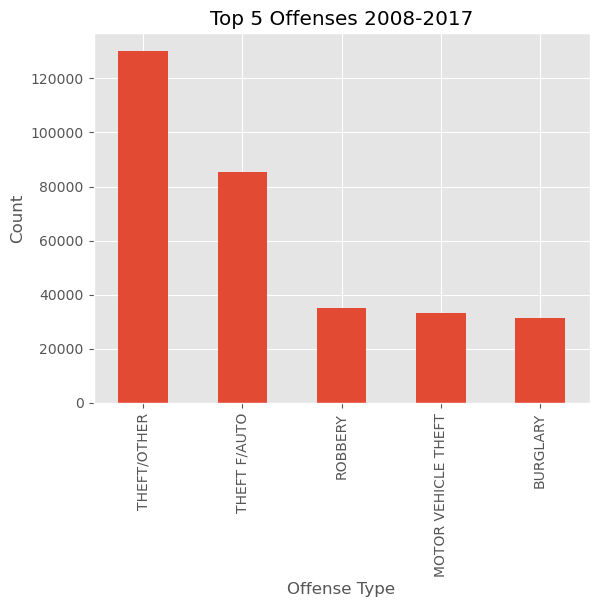

In [19]:
ax = df['offense'].value_counts() \
        .head(5) \
        .plot(kind='bar', title='Top 5 Offenses 2008-2017')
ax.set_xlabel('Offense Type')
ax.set_ylabel('Count')

## ~~Feature Relationships~~
*skipped for now*

## Asking Questions About the Data

### Seasonal Analysis

Summer (for our purposes: July, August, September)

In [22]:
summer_df = df[df['report_date'].dt.month.between(7,9)]
# Confirm df has only summer months
print("Numeric months in this df: ", summer_df['report_date'].dt.month.unique())
print("Shape: ", summer_df.shape)
summer_df.head()

Numeric months in this df:  [8 9 7]
Shape:  (95219, 10)


,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
0,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,-77.070209,38.913633,2008-08-31 20:47:00,2008,Northwest,Non-Violent
1,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,-77.045323,38.908564,2008-09-01 00:45:00,2008,Northwest,Non-Violent
2,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,-77.027045,38.899057,2008-09-01 03:00:00,2008,Northeast,Non-Violent
3,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,-77.040089,38.909638,2008-09-09 07:46:00,2008,Northwest,Non-Violent
4,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,-77.019377,38.894573,2008-08-24 20:00:00,2008,Northeast,Non-Violent


What was the top offense type for summer months?

In [23]:
summer_df['offense'].value_counts().nlargest(1)

offense
THEFT/OTHER    36777
Name: count, dtype: int64

What were the 3 least common offense types for summer months?

In [24]:
summer_df['offense'].value_counts().nsmallest(3)

offense
ARSON         84
HOMICIDE     344
SEX ABUSE    703
Name: count, dtype: int64

What was the top offense type by hour of day for summer?

In [147]:
# Create hour column for easier groupby
summer_df['report_date_hour'] = summer_df['report_date'].dt.hour.copy()

# Groupby on hour and offense and get the count of offenses by type
summer_offenses_by_hour = summer_df.groupby(['report_date_hour', 'offense']) \
    ['offense'].value_counts().reset_index()

# Sort hour ascending count of offense descending then keep only first occurrence of offense for each our
top_summer_offenses_by_hour = summer_offenses_by_hour.sort_values(by=['report_date_hour', 'count'], ascending=[True, False]) \
    .drop_duplicates(subset=['report_date_hour'], keep='first') \
    .reset_index(drop=True)

top_summer_offenses_by_hour

C:\Users\Ben\AppData\Local\Temp\ipykernel_30016\4125476304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df['report_date_hour'] = summer_df['report_date'].dt.hour.copy()


,report_date_hour,offense,count
0,0,THEFT/OTHER,857
1,1,THEFT/OTHER,615
2,2,ROBBERY,560
3,3,THEFT F/AUTO,554
4,4,THEFT F/AUTO,468
5,5,THEFT F/AUTO,410
6,6,THEFT F/AUTO,522
7,7,THEFT F/AUTO,986
8,8,THEFT F/AUTO,1408
9,9,THEFT F/AUTO,1584


### City Quadrant Analysis

What were the top 3 offense types for each quadrant?

In [26]:
df.groupby(['quad', 'offense']).size().groupby(level=0).nlargest(3).reset_index(1, drop=True)

quad       offense            
Northeast  THEFT/OTHER            71322
           THEFT F/AUTO           52974
           ROBBERY                21109
Northwest  THEFT/OTHER            34879
           THEFT F/AUTO           17317
           BURGLARY                5374
Southeast  THEFT/OTHER            23990
           THEFT F/AUTO           14913
           MOTOR VEHICLE THEFT    11404
Southwest  THEFT/OTHER                8
           THEFT F/AUTO               5
           MOTOR VEHICLE THEFT        1
dtype: int64

What was the most violent quandrant by count of (violent) offenses?

In [27]:
df.query('crimetype == "Violent"').reset_index(drop=True) \
    .groupby(['quad'])['offense'].count().nlargest(1)

quad
Northeast    35590
Name: offense, dtype: int64

### Location-Based Analysis

What were the top five blocks for auto theft per quadrant, visualized (as a heatmap)?

In [135]:
# Create a df just for auto theft for easier groupby
auto_theft = df.query('offense == "MOTOR VEHICLE THEFT"').reset_index(drop=True)
auto_theft

,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
0,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,-77.045323,38.908564,2008-09-01 00:45:00,2008,Northwest,Non-Violent
1,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,-77.019377,38.894573,2008-08-24 20:00:00,2008,Northeast,Non-Violent
2,EVENING,MOTOR VEHICLE THEFT,OTHERS,S STREET NW AND 39TH STREET NW,-77.075590,38.914405,2008-09-17 16:40:00,2008,Northwest,Non-Violent
3,EVENING,MOTOR VEHICLE THEFT,OTHERS,N STREET NW AND 27TH STREET NW,-77.055803,38.906874,2008-09-17 22:00:00,2008,Northwest,Non-Violent
4,DAY,MOTOR VEHICLE THEFT,OTHERS,3300 - 3399 BLOCK OF VOLTA PLACE NW,-77.066976,38.909752,2009-04-26 12:09:00,2009,Northwest,Non-Violent
...,...,...,...,...,...,...,...,...,...,...
33150,DAY,MOTOR VEHICLE THEFT,OTHERS,3500 - 3599 BLOCK OF 13TH STREET NW,-77.029730,38.933460,2008-07-23 14:00:00,2008,Northeast,Non-Violent
33151,EVENING,MOTOR VEHICLE THEFT,OTHERS,GEORGIA AVENUE NW AND BRYANT STREET NW,-77.021920,38.919990,2010-01-20 21:55:00,2010,Northeast,Non-Violent
33152,DAY,MOTOR VEHICLE THEFT,OTHERS,3000 - 3099 BLOCK OF SHERMAN AVENUE NW,-77.026160,38.928330,2010-02-15 08:00:00,2010,Northeast,Non-Violent
33153,DAY,MOTOR VEHICLE THEFT,OTHERS,2200 - 2230 BLOCK OF 6TH STREET NW,-77.020640,38.919610,2008-03-21 13:00:00,2008,Northeast,Non-Violent


In [142]:
# Groupby on quad and block to find top 5 blocks with auto theft offenses
top_quad_blocks_for_auto_theft = auto_theft.groupby(['quad', 'block']).size() \
    .groupby(level=0).nlargest(5).reset_index(1, drop=True).to_frame()
top_quad_blocks_for_auto_theft.reset_index(inplace=True)
top_quad_blocks_for_auto_theft

,quad,block,0
0,Northeast,3500 - 3899 BLOCK OF JAY STREET NE,166
1,Northeast,1 - 99 BLOCK OF MASSACHUSETTS AVENUE NE,122
2,Northeast,4100 - 4276 BLOCK OF EAST CAPITOL STREET,109
3,Northeast,2240 - 2399 BLOCK OF SOUTH DAKOTA AVENUE NE,60
4,Northeast,1000 - 1199 BLOCK OF VARNUM STREET NE,59
5,Northwest,3517 - 3648 BLOCK OF 16TH STREET NW,23
6,Northwest,1700 - 1779 BLOCK OF M STREET NW,17
7,Northwest,2400 - 2499 BLOCK OF 18TH STREET NW,17
8,Northwest,1800 - 1899 BLOCK OF CALIFORNIA STREET NW,15
9,Northwest,2400 - 2798 BLOCK OF CALVERT STREET NW,15


In [143]:
top_auto_theft_blocks = top_quad_blocks_for_auto_theft['block'].values.tolist()

In [144]:
top_auto_theft_blocks_df = auto_theft[auto_theft['block'].isin(top_auto_theft_blocks)].reset_index(drop=True)
top_auto_theft_blocks_df

,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
0,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,1700 - 1779 BLOCK OF M STREET NW,-77.039822,38.905648,2008-11-09 05:55:00,2008,Northwest,Non-Violent
1,DAY,MOTOR VEHICLE THEFT,OTHERS,1700 - 1779 BLOCK OF M STREET NW,-77.039822,38.905648,2009-04-29 13:10:00,2009,Northwest,Non-Violent
2,DAY,MOTOR VEHICLE THEFT,OTHERS,1700 - 1779 BLOCK OF M STREET NW,-77.039822,38.905648,2009-05-02 13:07:00,2009,Northwest,Non-Violent
3,DAY,MOTOR VEHICLE THEFT,OTHERS,1700 - 1779 BLOCK OF M STREET NW,-77.039822,38.905648,2009-06-29 13:00:00,2009,Northwest,Non-Violent
4,EVENING,MOTOR VEHICLE THEFT,OTHERS,1700 - 1779 BLOCK OF M STREET NW,-77.039822,38.905648,2013-12-18 19:30:00,2013,Northwest,Non-Violent
...,...,...,...,...,...,...,...,...,...,...
1062,DAY,MOTOR VEHICLE THEFT,OTHERS,3517 - 3648 BLOCK OF 16TH STREET NW,-77.036460,38.935880,2017-03-20 10:00:34,2017,Northwest,Non-Violent
1063,EVENING,MOTOR VEHICLE THEFT,OTHERS,3517 - 3648 BLOCK OF 16TH STREET NW,-77.036460,38.935880,2008-07-03 22:10:00,2008,Northwest,Non-Violent
1064,EVENING,MOTOR VEHICLE THEFT,OTHERS,3517 - 3648 BLOCK OF 16TH STREET NW,-77.036460,38.935880,2008-04-03 21:00:00,2008,Northwest,Non-Violent
1065,DAY,MOTOR VEHICLE THEFT,OTHERS,2400 - 2499 BLOCK OF 18TH STREET NW,-77.042370,38.921620,2008-05-13 07:34:00,2008,Northwest,Non-Violent


In [145]:
m = folium.Map(
    location=[
        top_auto_theft_blocks_df['block_lat'].mean(),
        top_auto_theft_blocks_df['block_lon'].mean(),
    ],
    zoom_start=12,
)

heat_data = top_auto_theft_blocks_df[['block_lat', 'block_lon']].values.tolist()
HeatMap(heat_data).add_to(m)

m

What were the top 10 blocks with most violent crime that occurred during the night? Where were they?
* We define night as: 10pm (2200) to 4am (0400)

In [195]:
violent_night_df = df.query('(report_date.dt.hour.between(22,24) or report_date.dt.hour.between(0, 4)) and crimetype == "Violent"')
violent_night_df

,shift,offense,method,block,block_lon,block_lat,report_date,year,quad,crimetype
26,EVENING,ROBBERY,GUN,10TH STREET NW AND M STREET NW,-77.025983,38.905643,2008-09-17 22:15:00,2008,Northeast,Violent
35,MIDNIGHT,ROBBERY,OTHERS,15TH STREET NW AND R STREET NW,-77.034550,38.912609,2009-04-18 04:30:00,2009,Northeast,Violent
42,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,OTHERS,1218 - 1299 BLOCK OF CONNECTICUT AVENUE NW,-77.041828,38.906845,2008-07-19 04:32:00,2008,Northwest,Violent
46,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,OTHERS,1106 - 1199 BLOCK OF MASSACHUSETTS AVENUE NW,-77.027808,38.904201,2008-09-09 04:00:00,2008,Northeast,Violent
65,MIDNIGHT,ROBBERY,GUN,R STREET NW AND NEW HAMPSHIRE AVENUE NW,-77.040660,38.912608,2009-05-05 01:03:00,2009,Northwest,Violent
...,...,...,...,...,...,...,...,...,...,...
342310,MIDNIGHT,ROBBERY,OTHERS,1400 - 1499 BLOCK OF W STREET NW,-77.033290,38.919180,2008-01-19 01:24:00,2008,Northeast,Violent
342326,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,KNIFE,1400 - 1499 BLOCK OF W STREET NW,-77.033290,38.919180,2008-03-26 01:10:00,2008,Northeast,Violent
342330,MIDNIGHT,ROBBERY,OTHERS,OTIS PLACE NW AND OGDEN STREET NW,-77.034820,38.935490,2008-02-07 03:15:00,2008,Northeast,Violent
342335,EVENING,ROBBERY,GUN,PRINCETON PLACE NW AND GEORGIA AVENUE NW,-77.024130,38.935230,2008-07-22 22:00:00,2008,Northeast,Violent


In [196]:
# Confirm that we only have night hours in our subset
included_hours = violent_night_df['report_date'].dt.hour.unique().tolist()
sorted(included_hours)

[0, 1, 2, 3, 4, 22, 23]

In [200]:
top_10_blocks_with_night_violence = violent_night_df.groupby(['block'])['offense'].value_counts().nlargest(10).reset_index()
top_10_blocks_with_night_violence

,block,offense,count
0,2400 - 2599 BLOCK OF ELVANS ROAD SE,ASSAULT W/DANGEROUS WEAPON,58
1,2400 - 2499 BLOCK OF 18TH STREET NW,ROBBERY,48
2,4000 - 4399 BLOCK OF 3RD STREET SE,ASSAULT W/DANGEROUS WEAPON,45
3,2400 - 2499 BLOCK OF 18TH STREET NW,ASSAULT W/DANGEROUS WEAPON,43
4,2400 - 2699 BLOCK OF POMEROY ROAD SE,ASSAULT W/DANGEROUS WEAPON,41
5,2400 - 2599 BLOCK OF ELVANS ROAD SE,ROBBERY,38
6,500 - 799 BLOCK OF RHODE ISLAND AVENUE NE,ROBBERY,32
7,1200 - 1499 BLOCK OF NORTH CAPITOL STREET,ASSAULT W/DANGEROUS WEAPON,30
8,1847 - 1999 BLOCK OF CALVERT STREET NW,ROBBERY,30
9,1200 - 1499 BLOCK OF NORTH CAPITOL STREET,ROBBERY,27


In [202]:
top_10_violent_night_blocks = top_10_blocks_with_night_violence['block'].values.tolist()

In [ ]:
top_auto_theft_blocks_df = auto_theft[auto_theft['block'].isin(top_auto_theft_blocks)].reset_index(drop=True)
top_auto_theft_blocks_df

In [93]:
# m = folium.Map(
#     location=[
#         df['block_lat'].mean(),
#         df['block_lon'].mean(),
#     ],
#     zoom_start=12,
# )

# for idx, row in auto_theft.iterrows():
#     folium.Marker(
#         location=[row['block_lat'], row['block_lon']],
#         popup=row['report_date'],
#     ).add_to(m)

# m